In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
hws = []
with open("top1m-h-wself.txt") as inp:
    inp.readline()
    inp.readline()
    
    for line in inp:
        hws.append(int(line[:-1]))

hwos = []
with open("top1m-h-woself.txt") as inp:
    inp.readline()
    inp.readline()
    
    for line in inp:
        hwos.append(int(line[:-1]))

In [3]:
hwwo = {}
for i, p in enumerate(hws):
    if p in hwwo: hwwo[p]["w"] = i + 1
    else: hwwo[p] = { "w": i + 1, "wo": None }
for i, p in enumerate(hwos):
    if p in hwwo: hwwo[p]["wo"] = i + 1
    else: hwwo[p] = { "wo": i + 1, "w": None }

In [4]:
common = []
for p in hwwo:
    if hwwo[p]["w"] is not None and hwwo[p]["wo"] is not None:
        common.append(p)
        
with open('commonpapers.txt', 'w') as out:
    out.write("{}\n\n".format(len(common)))
    for paper in common:
        out.write("{}\n".format(paper))

In [5]:
with open("communities.txt") as inp:
    inp.readline()
    inp.readline()
    
    for i, line in enumerate(inp):
        p = common[i]
        hwwo[p]["comm"] = int(line[:-1])

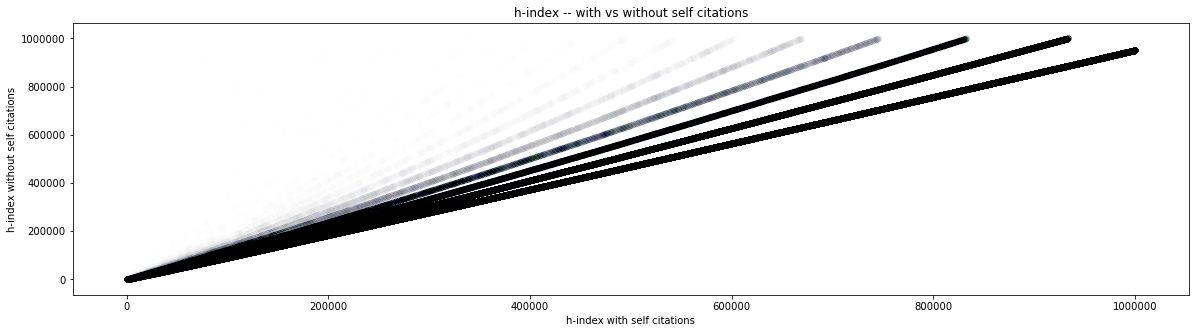

In [6]:
plt.figure(figsize=(20, 5))

plt.title("h-index -- with vs without self citations")
plt.xlabel("h-index with self citations")
plt.ylabel("h-index without self citations")

hwvswo = [[], [], [], [], [], []]
hwovsw = [[], [], [], [], [], []]
for p in hwwo:
    if hwwo[p]["w"] is not None and hwwo[p]["wo"] is not None:
        hwvswo[hwwo[p]["comm"]].append(hwwo[p]["w"])
        hwovsw[hwwo[p]["comm"]].append(hwwo[p]["wo"])

plt.scatter(hwvswo[0], hwovsw[0], c="k", alpha=0.005)
plt.scatter(hwvswo[1], hwovsw[1], c="b", alpha=0.005)
plt.scatter(hwvswo[2], hwovsw[2], c="g", alpha=0.005)
plt.scatter(hwvswo[3], hwovsw[3], c="c", alpha=0.005)
plt.scatter(hwvswo[4], hwovsw[4], c="m", alpha=0.005)
plt.scatter(hwvswo[5], hwovsw[5], c="y", alpha=0.005)

plt.show()

In [7]:
clusters = [[], [], [], [], [], []]
for p in common:
    r = hwwo[p]["wo"] / hwwo[p]["w"]
    
    if r >= 0.88 and r <= 0.96: clusters[0].append(hwwo[p]["comm"])
    if r >= 1.00 and r <= 1.08: clusters[1].append(hwwo[p]["comm"])
    if r >= 1.10 and r <= 1.18: clusters[2].append(hwwo[p]["comm"])
    if r >= 1.26 and r <= 1.34: clusters[3].append(hwwo[p]["comm"])
    if r >= 1.42 and r <= 1.50: clusters[0].append(hwwo[p]["comm"])
    if r >= 1.58 and r <= 1.66: clusters[0].append(hwwo[p]["comm"])
        
clusterratios = [0.92, 1.04, 1.14, 1.30, 1.46, 1.62]
for i, cluster in enumerate(clusters):
    print("Ratio:      {:.2f}\t\t\t\t\t0: {:.2f}   1: {:.2f}   2: {:.2f}   3: {:.2f}   4: {:.2f}   5: {:.2f}"
          .format(clusterratios[i], 
                  cluster.count(0) / 1000000, 
                  cluster.count(1) / 1000000, 
                  cluster.count(2) / 1000000, 
                  cluster.count(3) / 1000000, 
                  cluster.count(4) / 1000000, 
                  cluster.count(5) / 1000000))

Ratio:      0.92					0: 0.37   1: 0.05   2: 0.03   3: 0.03   4: 0.02   5: 0.01
Ratio:      1.04					0: 0.19   1: 0.03   2: 0.02   3: 0.02   4: 0.01   5: 0.01
Ratio:      1.14					0: 0.04   1: 0.01   2: 0.00   3: 0.00   4: 0.00   5: 0.00
Ratio:      1.30					0: 0.01   1: 0.00   2: 0.00   3: 0.00   4: 0.00   5: 0.00
Ratio:      1.46					0: 0.00   1: 0.00   2: 0.00   3: 0.00   4: 0.00   5: 0.00
Ratio:      1.62					0: 0.00   1: 0.00   2: 0.00   3: 0.00   4: 0.00   5: 0.00


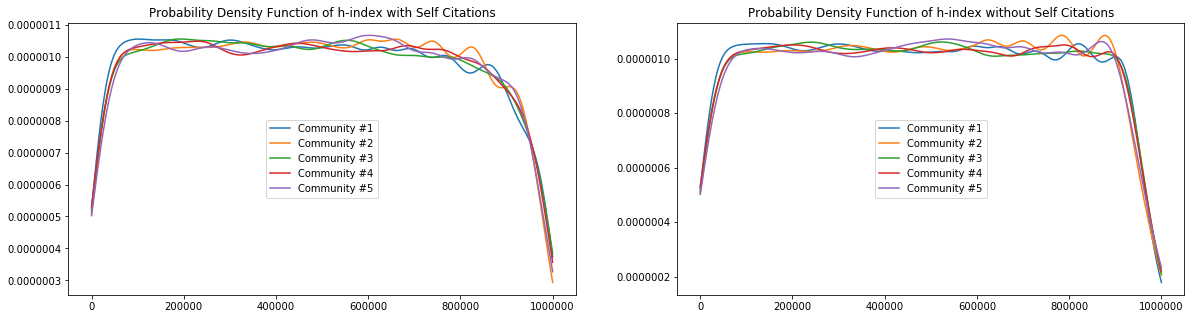

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title("Probability Density Function of h-index with Self Citations")

for i in range(1, 6):
    data = np.array([hwwo[p]["w"] for p in common if hwwo[p]["comm"] == i])
    kde = scipy.stats.gaussian_kde(data)
    plt.plot(np.linspace(0, 1000000, 1000), kde(np.linspace(0, 1000000, 1000)), label='Community #'+str(i))
plt.legend(loc='center')

plt.subplot(1, 2, 2)
plt.title("Probability Density Function of h-index without Self Citations")

for i in range(1, 6):
    data = np.array([hwwo[p]["wo"] for p in common if hwwo[p]["comm"] == i])
    kde = scipy.stats.gaussian_kde(data)
    plt.plot(np.linspace(0, 1000000, 1000), kde(np.linspace(0, 1000000, 1000)), label='Community #'+str(i))
plt.legend(loc='center')

plt.show()